### Lennard-Jones potential

a simple yet realistic model for intermolecular interactions

$V_{LJ}(r)=4\varepsilon\left[\left(\dfrac{\sigma}{r}\right)^{12}-\left(\dfrac{\sigma}{r}\right)^{6}\right]$

In [1]:
class particle: # Generates particle for simulation
    def __init__(self,name,initial_position,initial_velocity,epsilon=10,sigma=0.1,mass=1):
        self.name=name
        self.positions=[tuple(initial_position)]
        self.velocities=[tuple(initial_velocity)]
        self.epsilon=epsilon  # dispersion energy
        self.sigma=sigma      # particle size
        self.mass=mass
    def other_particles(self,others):
        self.others = list(others)
        self.others.remove(self)
    def update(self,time_step): 
        self.forces = []
        for p in self.others:
            self.r = tuple(self.positions[-1][_]-p.positions[-1][_]
                            for _ in range(3))
            self.r_magnitude = (self.r[0]**2+self.r[1]**2+self.r[2]**2)**0.5
            if self.r_magnitude/self.epsilon<2.5:
                  self.r_unit = tuple(_/self.r_magnitude for _ in self.r)
            else: self.r_unit = (0,0,0) # ignoring negligible long range effects 
            self.forces.append(tuple(_*(24*self.epsilon/self.r_magnitude)
                                          *((self.sigma/self.r_magnitude)**6
                                         -2*(self.sigma/self.r_magnitude)**12)
                                             for _ in self.r_unit)) # force = gradient(potential)
        self.acceleration = tuple(sum(_)/self.mass for _ in  zip(*self.forces))
        self.velocities.append(tuple(self.acceleration[_]*time_step+self.velocities[-1][_] 
                                     for _ in range(3)))
        self.positions.append(tuple(0.5*self.acceleration[_]*time_step**2+self.velocities[-1][_]*time_step+self.positions[-1][_] 
                                    for _ in range(3)))
    def __str__(self):
        return f'{self.name}({self.positions[-1]},{self.velocities[-1]})'

def simulation(particles,time_step,duration): # updates particle properties
    for p in particles: p.other_particles(particles)
    while(duration>0):
        for p in particles: p.update(time_step)
        duration-=time_step

In [2]:
m,n = 2,0.05
v = 1
e,s = 1,0.1
test_particles =(
# A := particle('A',( 0, 0, 0),( 0, 0, 0),e,s),
B := particle('B',( m, n, 0),(-v, 0, 0),e,s),
C := particle('C',( 0, m, n),( 0,-v, 0),e,s),
D := particle('D',( n, 0, m),( 0, 0,-v),e,s),
E := particle('E',(-m,-n, 0),( v, 0, 0),e,s),
F := particle('F',( 0,-m,-n),( 0, v, 0),e,s),
G := particle('G',(-n, 0,-m),( 0, 0, v),e,s)
)

In [3]:
simulation(test_particles,0.001,3)

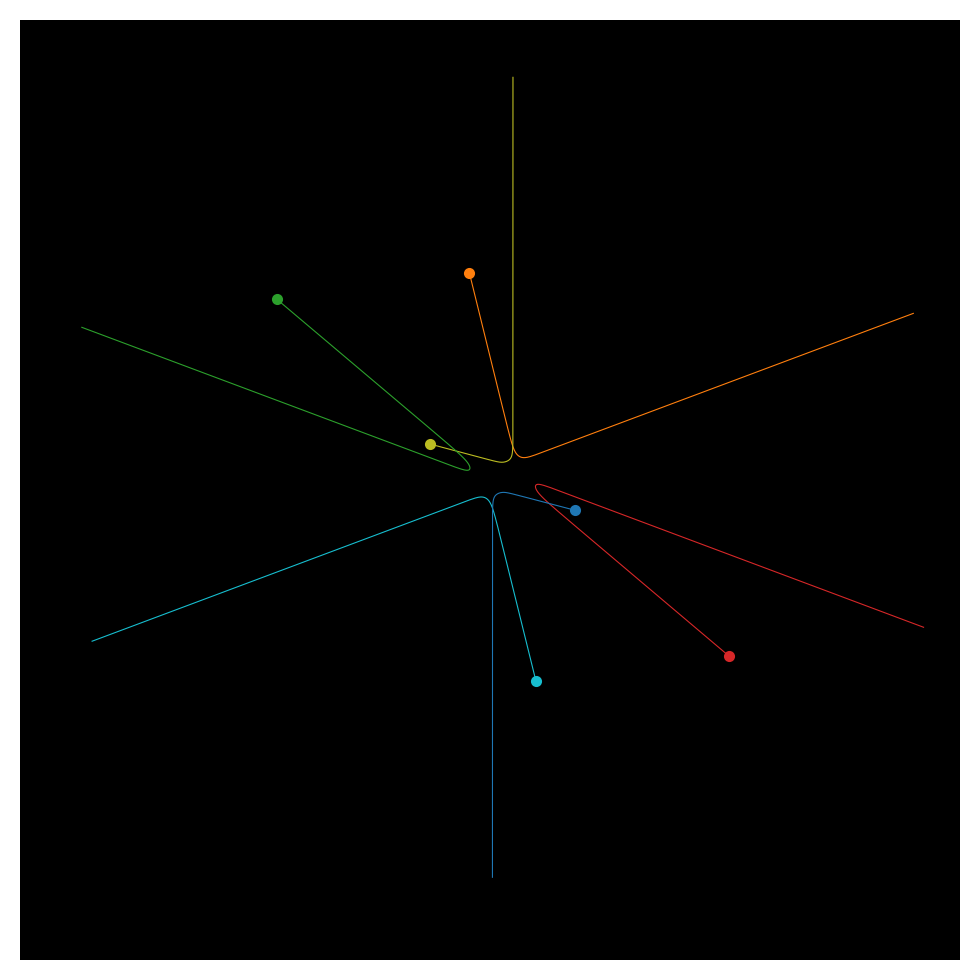

In [4]:
import matplotlib.pyplot as plt
color = {'A':'w',
         'B':'tab:red',
         'C':'tab:orange',
         'D':'tab:olive',
         'E':'tab:green',
         'F':'tab:cyan',
         'G':'tab:blue'}
fig = plt.figure(figsize=(5,5),dpi=200)
ax = plt.axes(projection='3d',proj_type='ortho')
ax.view_init(22,-45)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_facecolor('k')
ax.set_axis_off()
plt.tight_layout()
for i,p in enumerate(test_particles):
    x,y,z = tuple(zip(*p.positions))
    ax.plot(x,y,z,color=color.get(p.name),lw=0.4)
    ax.plot(x[-1],y[-1],z[-1],color=color.get(p.name),marker='.')
plt.show()